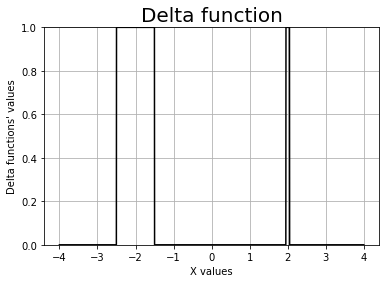

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val

def plotting(X,data):
    plt.cla()
    plt.grid()
    plt.title('Delta function',size=20)
    plt.xlabel('X values',size=10)
    plt.ylabel("Delta functions' values",size=10)
    plt.ylim(0,1)
    plt.plot(X,data,color='black')
    plt.show()

left = -2
right = 2
len = 1000
X=np.linspace(left,right,len)
a = ddf(X,1)
b = ddf(X,10)
signal = np.hstack([a,b])
x=np.linspace(left*2,right*2,len*2)
plotting(x,signal)


Опишем параметры цели

In [39]:
target_position = np.array([10,10,100]) # [метр] в СК антенны
lambd = 0.03

Определим направляющие косинусы цели

In [40]:
target_position_normalize = target_position/np.linalg.norm(target_position)

Определим направление излучения антенны

In [41]:
teta = np.deg2rad(0)
fi = np.deg2rad(0)

U = np.cos(teta)*np.sin(fi)
V = np.sin(fi)
W = np.sqrt(1-U**2-V**2)

Строим двумерную дельта-функцию

In [44]:
def delta_function(x,y,a):
    val = np.zeros((x.size,y.size))
    val[((x**2+y**2)<=a**2),((x**2+y**2)<=a**2)] = 1/(np.pi*a**2)
    return val

def plotting(x,y,data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,data)
    plt.show()

left = -2
right = 2
length = 100
X = Y=np.linspace(left,right,length)
a = delta_function(X,Y,1)
b = delta_function(X,Y,10)
signal = np.hstack([a,b])
y=np.linspace(left*2,right*2,length*2)
xgrid, ygrid = np.meshgrid(X, y)
%matplotlib
plotting(xgrid,ygrid,signal.transpose())

Using matplotlib backend: TkAgg
